# The best neighborhood in Pittsburgh 

**Introduction**
* For this project, the group’s goal was to determine the best neighborhood in Pittsburgh using data from the Western Pennsylvania Regional Data Center (WPRDC). My role focused on developing and analyzing a metric to measure which neighborhoods are the safest and most convenient to live in. To do this, I helped decide what factors would best represent safety and accessibility. At first, we considered other possible metrics like income levels or housing costs, but we agreed that those didn’t directly reflect everyday safety and ease of transportation. We then focused on using data related to fire incidents, non-traffic citations, and transit stops to create a data-driven way to compare neighborhoods.

**Metric**
* The metric we worked on measures both safety and convenience using three datasets. The first dataset, Fire Incidents in the City of Pittsburgh tracks every reported fire, which helps identify neighborhoods with lower risk of property damage or emergencies. The second dataset, Non-Traffic Citations, provides information about safety and local behavior issues. The third dataset, Transit Stops in Pittsburgh, shows how accessible public transportation is in each neighborhood. We combined these features by identifying neighborhoods with fewer fire incidents and citations but a higher number of transit stops. This gave us a clear, data-supported way to find the neighborhoods that are both safe and convenient.

# Non traffic Citation Data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Non-Traffic-Citations.csv")
df.head()

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403


In [2]:
neighborhoods= df["NEIGHBORHOOD"].value_counts().sort_values(ascending=True)
for neighborhood, num in neighborhoods.items():
    if neighborhood != "Outside County" and neighborhood != "Outside State":
        print(neighborhood, num)


St. Clair 3
Chartiers City 3
Mt. Oliver Boro 3
Mt. Oliver Neighborhood 4
Ridgemont 4
Swisshelm Park 6
Unable To Retrieve Address 7
Arlington Heights 7
Summer Hill 7
New Homestead 8
Hays 9
Outside City 9
Regent Square 9
Oakwood 10
Spring Garden 10
Fairywood 14
Friendship 17
Windgap 17
Polish Hill 18
Duquesne Heights 21
East Carnegie 22
Allegheny West 24
Morningside 24
Bon Air 25
Upper Hill 26
Mount Oliver 28
Stanton Heights 28
Esplen 29
West End 31
Lower Lawrenceville 31
Glen Hazel 33
Manchester 35
California-Kirkbride 35
Upper Lawrenceville 35
Westwood 36
Terrace Village 39
Fineview 39
Banksville 39
Lincoln Place 41
Golden Triangle/Civic Arena 42
Point Breeze North 48
Point Breeze 51
Highland Park 51
Troy Hill 51
South Shore 52
Perry North 53
Spring Hill-City View 55
Overbrook 58
Homewood West 58
West Oakland 63
Crafton Heights 64
Chateau 66
Bedford Dwellings 69
Northview Heights 70
Beltzhoover 78
Perry South 85
Strip District 101
Arlington 102
Crawford-Roberts 102
Garfield 106
Middle 

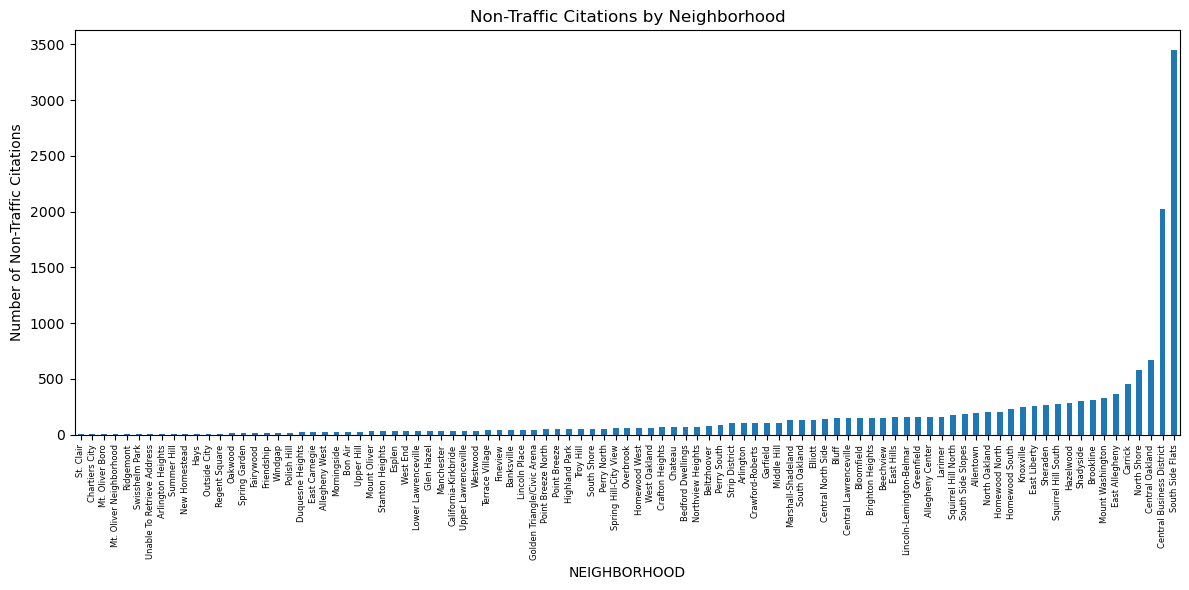

In [3]:
import matplotlib.pyplot as plt

# Get value counts, excluding unwanted neighborhoods
neighborhoods = (df["NEIGHBORHOOD"].value_counts().sort_values(ascending=True).drop(["Outside County", "Outside State"], errors="ignore"))

# Plot the filtered data
plt.figure(figsize=(12, 6))
neighborhoods.plot(kind="bar")
plt.xticks(fontsize=6, rotation=90)
plt.ylabel("Number of Non-Traffic Citations")
plt.title("Non-Traffic Citations by Neighborhood")
plt.tight_layout()
plt.show()

# The neighborhood with the least non-traffic Citations is **St. Clair which had a total of 3.**

---
# Transit Stops Data:

In [8]:
import geopandas as gpd
import folium
import math


# data
gdf = gpd.read_file("prt-stops.geojson")

# center, map
center = [gdf.geometry.y.mean(), gdf.geometry.x.mean()]
m = folium.Map(location=center, zoom_start=12)


# bus stop
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=1,
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

m.add_child(folium.LatLngPopup())

m.save("pittsburgh_bus_stops.html")
m

ModuleNotFoundError: No module named 'geopandas'

![](./Stops.png)

In [2]:
def count_stops_simple(lat, lon, radius_miles, gdf):
    """
    lat, lon : center coordinates (degrees)
    radius_miles : radius (miles)
    gdf : preloaded GeoDataFrame (assumed EPSG:4326)
    """
    # Approximation: 1 degree of latitude ≈ 69 miles, longitude ≈ 69 * cos(latitude)
    lat_per_mile = 1 / 69.0
    lon_per_mile = 1 / (69.0 * math.cos(math.radians(lat)))

    # Convert radius to degrees
    dlat = radius_miles * lat_per_mile
    dlon = radius_miles * lon_per_mile

    count = 0
    for point in gdf.geometry:
        plat, plon = point.y, point.x
        # Quick bounding-box check
        if abs(plat - lat) <= dlat and abs(plon - lon) <= dlon:
            # Compute simple Euclidean distance in miles
            dist = math.sqrt(((plat - lat)/lat_per_mile)**2 + ((plon - lon)/lon_per_mile)**2)
            if dist <= radius_miles:
                count += 1
    return count

num = count_stops_simple(40.4406, -79.9959, 0.1, gdf)
print(num)

NameError: name 'gdf' is not defined

# Visualization of a 0.3-mile radius around each neighborhood

![](Circle.png)

# The number of bus stops within 0.3 miles of each neighborhood’s coordinates

{'Swisshelm Park': 0, 'New Homestead': 0, 'Sheraden': 1, 'Ridgemont': 1, 'Brookline': 3, 'Lincoln Place': 3, 'Crafton Heights': 4, 'South Oakland': 5, 'Banksville': 5, 'Esplen': 5, 'Oakwood': 5, 'Squirrel Hill South': 6, 'Bon Air': 6, 'Hays': 6, 'North Shore': 7, 'Bedford Dwellings': 8, 'Overbrook': 8, 'South Side Slopes': 8, 'St. Clair': 8, 'Carrick': 9, 'Stanton Heights': 9, 'East Carnegie': 9, 'Perry North': 10, 'Duquesne Heights': 10, 'Chateau': 10, 'Chartiers City': 10, 'Windgap': 11, 'West End': 11, 'Fairywood': 12, 'Greenfield': 12, 'Larimer': 12, 'Glen Hazel': 12, 'Central Lawrenceville': 13, 'Marshall-Shadeland': 13, 'Mt. Oliver': 14, 'Summer Hill': 15, 'Arlington Heights': 15, 'Brighton Heights': 17, 'Arlington': 17, 'Point Breeze': 17, 'Bluff': 17, 'Westwood': 17, 'South Shore': 17, 'Squirrel Hill North': 18, 'Manchester': 19, 'Knoxville': 19, 'Elliott': 19, 'Fineview': 20, 'Beechview': 20, 'Middle Hill': 20, 'Garfield': 20, 'Spring Hill-City View': 20, 'Hazelwood': 20, 'Upper Lawrenceville': 20, 'Spring Garden': 20, 'Northview Heights': 20, 'Central Business District': 21, 'Regent Square': 21, 'Strip District': 22, 'East Liberty': 22, 'East Allegheny': 23, 'Troy Hill': 23, 'Point Breeze North': 23, 'Morningside': 23, 'South Side Flats': 24, 'Upper Hill': 24, 'Polish Hill': 24, 'Perry South': 24, 'Homewood North': 25, 'East Hills': 25, 'Mount Washington': 26, 'Allegheny West': 26, 'Allentown': 27, 'Homewood South': 28, 'Crawford-Roberts': 28, 'Allegheny Center': 29, 'Central Northside': 29, 'Homewood West': 30, 'Highland Park': 30, 'California-Kirkbride': 31, 'Shadyside': 32, 'Bloomfield': 33, 'Mount Oliver Borough': 33, 'Lower Lawrenceville': 35, 'Central Oakland': 36, 'Terrace Village': 37, 'Friendship': 38, 'West Oakland': 38, 'Beltzhoover': 39, 'North Oakland': 40, 'Lincoln-Lemington-Belmar': 41}

# The neighborhood with the most transit stops is **Lincoln-Lemington-Belmar**

---
# Fire Incidents Data:

In [3]:
import pandas as pd

df = pd.read_csv("Fire-Incidents.csv")
df.head()

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [4]:
neighborhoods= df["neighborhood"].value_counts().sort_values(ascending=True)
for neighborhood, num in neighborhoods.items():
    print(neighborhood, num)

Mount Oliver Borough 7
Regent Square 9
East Carnegie 11
Ridgemont 12
Mt. Oliver 12
Arlington Heights 13
Oakwood 13
St. Clair 15
Swisshelm Park 17
Chartiers City 18
Summer Hill 21
Glen Hazel 21
New Homestead 22
Bon Air 23
West End 23
Esplen 23
Hays 24
Windgap 25
Spring Garden 27
Fairywood 27
South Shore 28
Westwood 29
Friendship 34
Morningside 38
Polish Hill 40
Duquesne Heights 43
Allegheny West 44
Chateau 44
California-Kirkbride 45
Bedford Dwellings 49
Point Breeze North 52
Upper Hill 53
Fineview 54
Arlington 55
Upper Lawrenceville 58
Banksville 62
Overbrook 63
Allegheny Center 63
Stanton Heights 64
Homewood West 65
Lower Lawrenceville 67
Northview Heights 67
West Oakland 68
Lincoln Place 72
Elliott 75
Point Breeze 78
Strip District 80
Central Lawrenceville 80
Manchester 84
Highland Park 86
Terrace Village 88
Crafton Heights 89
Troy Hill 89
North Shore 91
Central Oakland 104
South Oakland 104
Middle Hill 110
South Side Slopes 115
Perry North 117
Crawford-Roberts 117
Spring Hill-City Vi

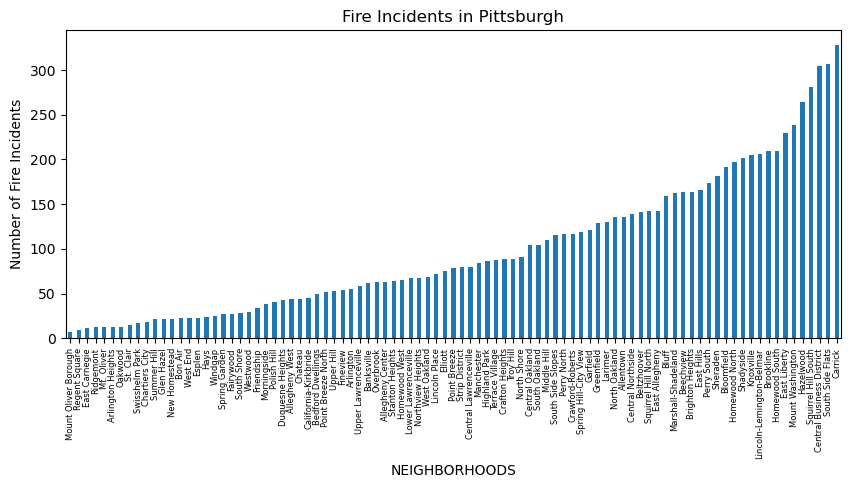

In [5]:
import matplotlib.pyplot as plt

neighborhoods= df["neighborhood"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10,4))
neighborhoods.plot(kind="bar")
plt.xticks(fontsize=6)
plt.title("Fire Incidents in Pittsburgh")
plt.ylabel("Number of Fire Incidents")
plt.xlabel("NEIGHBORHOODS")
plt.show()

In [6]:
building_fires = df[df["type_description"] == "Building fire"]
neighborhoods = building_fires["neighborhood"].value_counts().sort_values(ascending=True)
table = neighborhoods.reset_index()
table.columns = ["neighborhood", "instances"]
print(table.head(10))

           neighborhood  instances
0             St. Clair          1
1            Glen Hazel          1
2         Regent Square          1
3         New Homestead          1
4      Allegheny Center          2
5  Mount Oliver Borough          2
6     Arlington Heights          2
7        Swisshelm Park          3
8            Friendship          3
9               Bon Air          3


# **Mount Oliver Borough** has the least amount of fire incidents and severe fires.

---
# Conclusion

The best neighborhood in Pittsburgh is **Mount Oliver Borough**. It is tied for first in the Non Traffic Citations with St. Clair and Chartiers City proving the neighborhood's safety. It has the least amount of fire incidents and is second for the least amount of severe fires. The neighborhood is also within the top 10 of neighborhoods with the most transit stops for convenience. Overall, the safety and convenience from the information in our datasets makes Mount Oliver Borough the best neighborhood in Pittsburgh.